In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df["age"].value_counts()

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

In [64]:
df["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [9]:
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

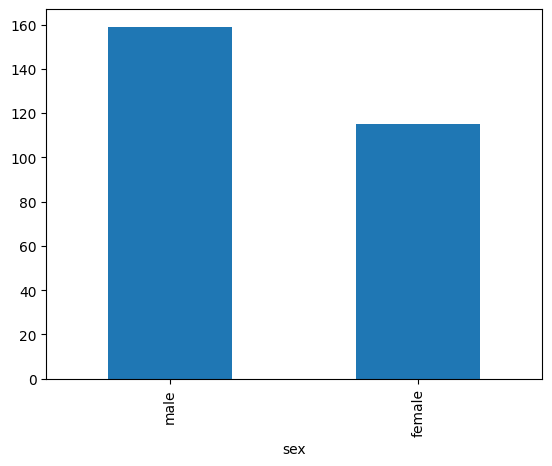

In [26]:
import matplotlib.pyplot as plt
df[df["smoker"]=='yes']['sex'].value_counts().plot.bar()
plt.show()

<Axes: xlabel='smoker', ylabel='count'>

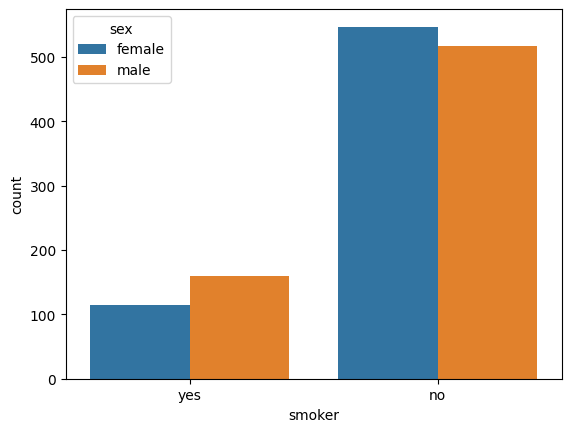

In [27]:
import seaborn as sns
sns.countplot(df, x= "smoker", hue = "sex")

<Axes: xlabel='smoker', ylabel='count'>

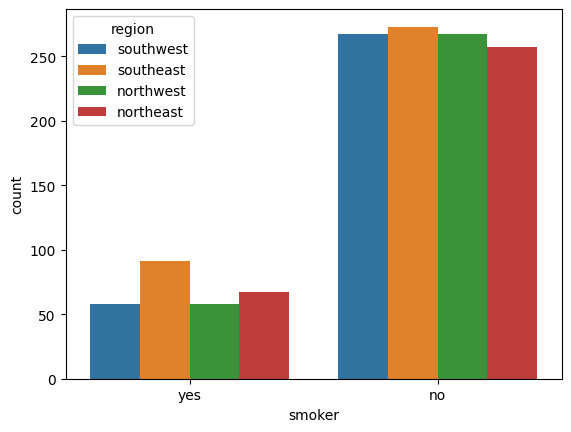

In [28]:
sns.countplot(df, x="smoker", hue="region")

<Axes: xlabel='smoker'>

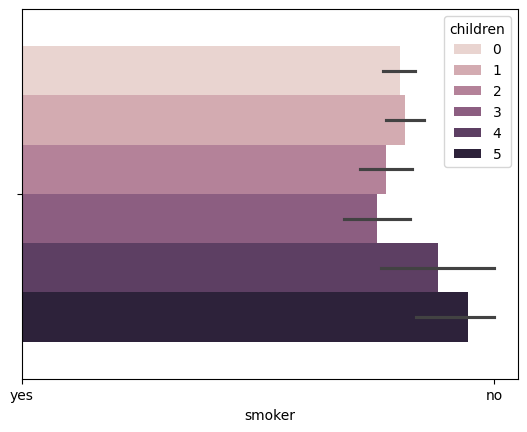

In [36]:
sns.barplot(df, x= "smoker",hue="children")

In [40]:
df["bmi"].value_counts()

bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64

In [48]:
r = df.groupby("region")
cha_df = r["charges"].agg(["min", "max", "mean"])
cha_df

,min,max,mean
region,,,
northeast,1694.7964,58571.07448,13406.384516
northwest,1621.3402,60021.39897,12417.575374
southeast,1121.8739,63770.42801,14735.411438
southwest,1241.5650,52590.82939,12346.937377


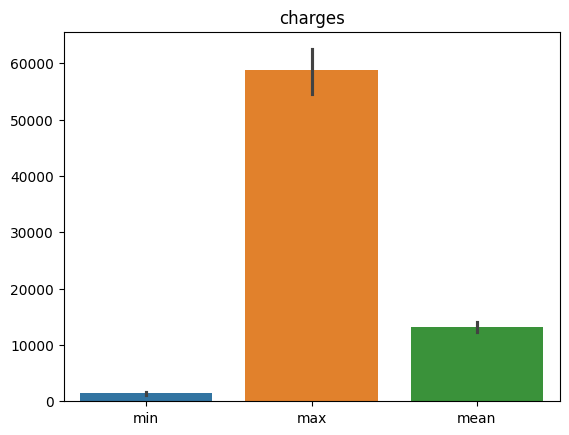

In [67]:
sns.barplot(cha_df)
plt.title("charges")
plt.show()

<Axes: xlabel='region', ylabel='count'>

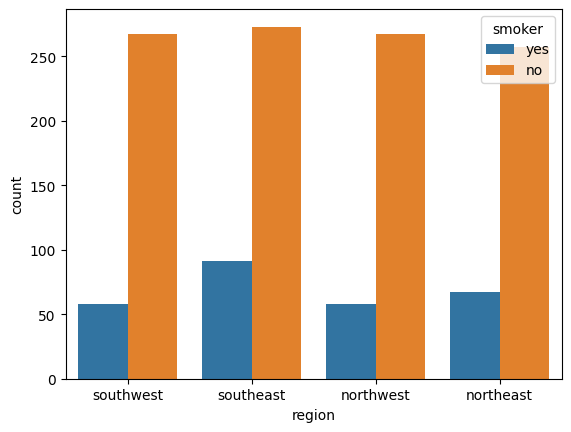

In [68]:
sns.countplot(df, x="region", hue="smoker")

<Axes: xlabel='region'>

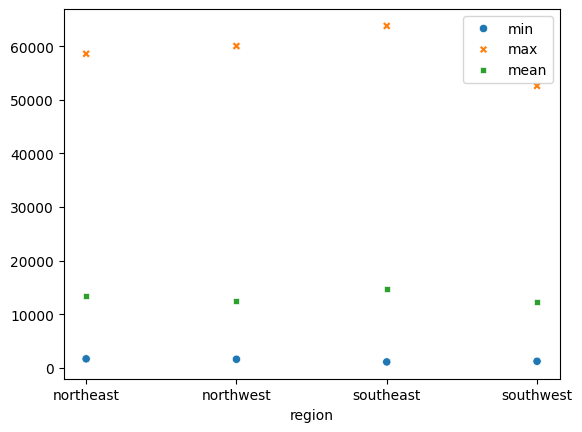

In [54]:
sns.scatterplot(cha_df)

<Axes: xlabel='charges', ylabel='Count'>

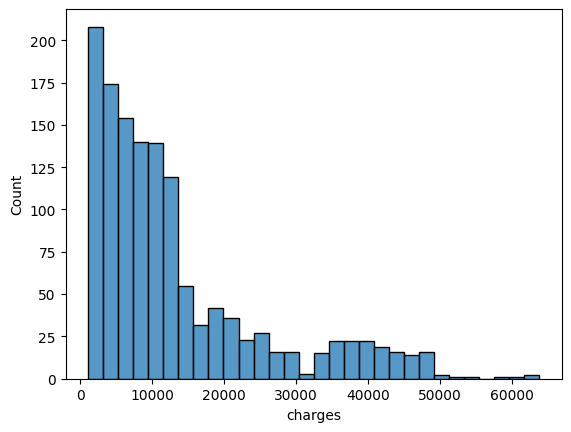

In [57]:
sns.histplot(df, x="charges")

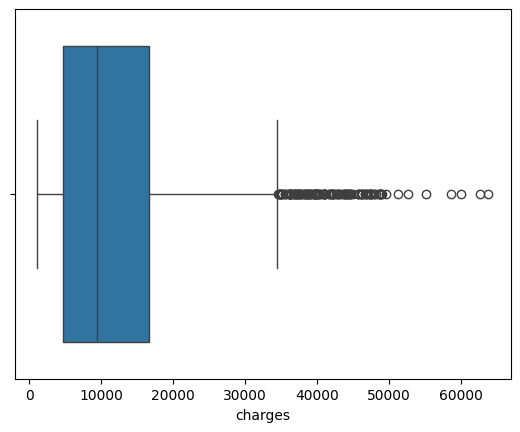

In [62]:
sns.boxplot(df, x="charges")
plt.show()

In [71]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [76]:
df = df.drop_duplicates()

In [77]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [78]:
y = df.pop("charges")
X = df

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 0)

In [80]:
X_train_cat = X_train.select_dtypes("object")
X_train_num = X_train.select_dtypes(["int64", "float64"])

In [84]:
X_train_cat.head()

,sex,smoker,region
196,female,no,southwest
1103,male,no,southeast
183,female,no,northwest
1298,male,no,northwest
471,female,no,northeast


In [86]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
X_train_cat_tansformed = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(), 
                              index = X_train_cat.index)

X_train_cat_tansformed.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
196,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1103,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
183,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1298,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
471,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num),
                                    columns = scaler.get_feature_names_out(),
                                       index = X_train_num.index)

X_train_num_transformed.head()

,age,bmi,children
196,-0.025397,0.323114,-0.900584
1103,1.329470,0.859103,-0.900584
183,0.331147,-0.721086,-0.900584
1298,-0.453249,-0.550321,0.740832
471,-1.522880,-0.115646,-0.900584


In [90]:
X_train_transformed = pd.concat([X_train_cat_tansformed,X_train_num_transformed ], axis =1)

In [91]:
X_train_transformed

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children
196,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.025397,0.323114,-0.900584
1103,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.329470,0.859103,-0.900584
183,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.331147,-0.721086,-0.900584
1298,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.453249,-0.550321,0.740832
471,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.522880,-0.115646,-0.900584
...,...,...,...,...,...,...,...,...,...,...,...
764,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.402456,-0.922899,0.740832
836,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.239323,0.110679,-0.900584
1217,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.738484,1.056831,0.740832
559,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.451572,0.769227,-0.900584


In [92]:
X_test.head()

,age,sex,bmi,children,smoker,region
1248,18,female,39.82,0,no,southeast
610,47,female,29.37,1,no,southeast
393,49,male,31.35,1,no,northeast
503,19,male,30.25,0,yes,southeast
198,51,female,18.05,0,no,northwest


In [93]:
X_test_cat = X_test.select_dtypes("object")
X_test_num = X_test.select_dtypes(["int64", "float64"])

In [95]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
X_test_cat_transformed = pd.DataFrame(encoder.fit_transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(), 
                               index = X_test_cat.index)
X_test_cat_transformed.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1248,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
610,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
393,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
503,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
198,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test_num_transformed = pd.DataFrame(scaler.fit_transform(X_test_num),
                                    columns = scaler.get_feature_names_out(),
                                       index = X_test_num.index)

X_test_num_transformed.head()

,age,bmi,children
1248,-1.486146,1.579389,-0.930584
610,0.574940,-0.153026,-0.078432
393,0.717084,0.175221,-0.078432
503,-1.415074,-0.007138,-0.930584
198,0.859228,-2.029671,-0.930584


In [98]:
X_test_tansformed = pd.concat([X_test_cat_tansformed, X_test_num_transformed], axis =1)

In [99]:
X_test_tansformed

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children
1248,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.486146,1.579389,-0.930584
610,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.574940,-0.153026,-0.078432
393,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.717084,0.175221,-0.078432
503,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.415074,-0.007138,-0.930584
198,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.859228,-2.029671,-0.930584
...,...,...,...,...,...,...,...,...,...,...,...
1320,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.562211,0.127973,1.625872
97,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.143515,1.324086,-0.930584
786,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.498875,1.104426,-0.930584
1181,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.059714,-0.061017,-0.930584


In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [102]:
from sklearn.neighbors import KNeighborsRegressor
tuned_parameters = [{'n_neighbors':[i for i in range(1,30)], 'p':[1, 2, 3]}]

clf = GridSearchCV(
    estimator=KNeighborsRegressor(), 
    param_grid=tuned_parameters, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 87 candidates, totalling 435 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29],
                          'p': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

In [103]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

Best parameters set found on train set
{'n_neighbors': 5, 'p': 1}
KNeighborsRegressor(p=1)



In [104]:
print('Score on Test Data: ', clf.score(X_test_tansformed , y_test))

Score on Test Data:  0.7686329631755834


In [105]:
cv_results = pd.DataFrame(clf.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005091,0.001954,0.005379,0.001501,1,1,"{'n_neighbors': 1, 'p': 1}",0.594850,0.599552,0.680113,...,0.644967,0.045952,60,0.998590,0.996596,1.000000,0.995146,0.994605,0.996988,0.002043
1,0.006983,0.001262,0.007180,0.001324,1,2,"{'n_neighbors': 1, 'p': 2}",0.641665,0.613962,0.608040,...,0.628026,0.053051,70,0.998590,0.996596,1.000000,0.995146,0.994605,0.996988,0.002043
2,0.006982,0.002274,0.016859,0.002683,1,3,"{'n_neighbors': 1, 'p': 3}",0.643438,0.592064,0.536130,...,0.605521,0.069798,78,0.998590,0.996596,1.000000,0.995146,0.994605,0.996988,0.002043
3,0.004189,0.001164,0.005289,0.001072,2,1,"{'n_neighbors': 2, 'p': 1}",0.654555,0.698756,0.756385,...,0.719454,0.043664,11,0.912651,0.909368,0.917515,0.910028,0.906550,0.911222,0.003697
4,0.004402,0.001026,0.004684,0.001168,2,2,"{'n_neighbors': 2, 'p': 2}",0.671533,0.698198,0.684276,...,0.691260,0.040104,30,0.910271,0.910853,0.917177,0.903576,0.907308,0.909837,0.004488


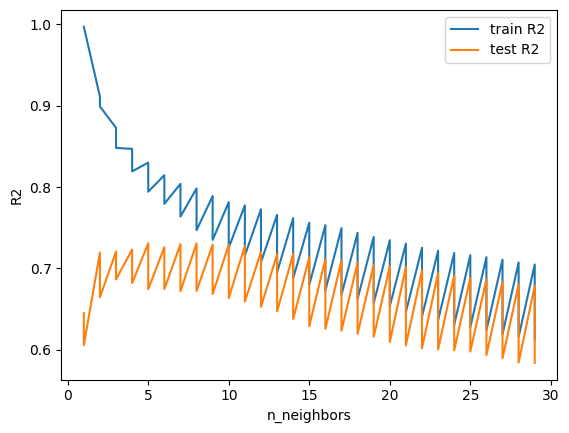

In [106]:
plt.plot(cv_results['param_n_neighbors'], cv_results['mean_train_score'])
plt.plot(cv_results['param_n_neighbors'], cv_results['mean_test_score'])
plt.xlabel('n_neighbors')
plt.ylabel("R2")
plt.legend(['train R2', 'test R2'], loc='upper right')

In [108]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
tuned_parameters = [{'n_neighbors': [i for i in range(1, 51)], 
                     'p': [1, 2, 3]}]

clf = RandomizedSearchCV(
    estimator=KNeighborsRegressor(), 
    param_distributions=tuned_parameters, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...],
                                         'p': [1, 2, 3]}],
                   return_train_score=True, scoring='r2', verbose=1)

In [109]:
print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

Best parameters set found on train set:
{'p': 1, 'n_neighbors': 19}
KNeighborsRegressor(n_neighbors=19, p=1)



In [110]:
regressor = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=1)
regressor.fit(X_train_transformed, y_train)
y_test_pred = regressor.predict(X_test_tansformed)

In [111]:
from sklearn import metrics
print(metrics.r2_score(y_test, y_test_pred))

0.7686329631755834


## DecisionTree Regressor

In [112]:
from sklearn.tree import DecisionTreeRegressor
aram_grid = {
   
    'max_depth': [2,3, 4,5,6, 7, 8,9,10,11]
}

clf = GridSearchCV(
    estimator =  DecisionTreeRegressor(random_state=42),
    param_grid=aram_grid, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
             return_train_score=True, scoring='r2', verbose=1)

In [113]:
cv_results = pd.DataFrame(clf.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006493,0.004324,0.002792,0.000747,2,{'max_depth': 2},0.832665,0.766256,0.814821,0.835964,...,0.820009,0.029158,4,0.825840,0.840416,0.829004,0.826495,0.819973,0.828346,0.006722
1,0.004188,0.000398,0.002593,0.000488,3,{'max_depth': 3},0.861220,0.812970,0.823152,0.863546,...,0.845929,0.023111,1,0.855669,0.866134,0.863748,0.855235,0.851579,0.858473,0.005521
2,0.006274,0.001643,0.002596,0.000797,4,{'max_depth': 4},0.862682,0.770270,0.823261,0.880454,...,0.841630,0.040672,2,0.866323,0.877344,0.876348,0.866484,0.863524,0.870004,0.005693
3,0.005385,0.000489,0.002993,0.001410,5,{'max_depth': 5},0.836937,0.754433,0.825119,0.864191,...,0.829824,0.041058,3,0.885277,0.889125,0.892920,0.882395,0.879285,0.885800,0.004818
4,0.010788,0.005124,0.003993,0.001089,6,{'max_depth': 6},0.800578,0.744241,0.777762,0.839840,...,0.805721,0.043376,5,0.909258,0.913311,0.913567,0.901394,0.896532,0.906813,0.006766


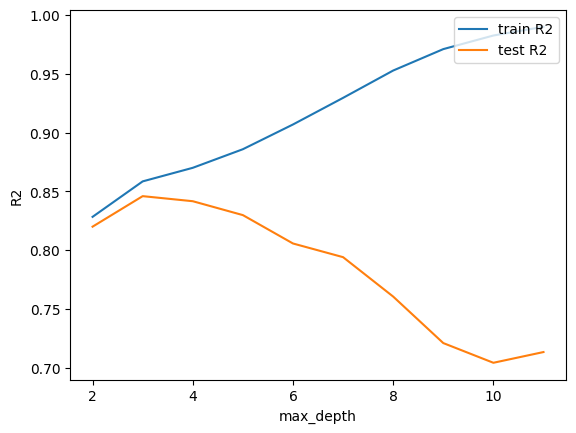

In [114]:
plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel("R2")
plt.legend(['train R2', 'test R2'], loc='upper right')

In [115]:
print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

Best parameters set found on train set:
{'max_depth': 3}
DecisionTreeRegressor(max_depth=3, random_state=42)



In [116]:
clf = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_distributions=aram_grid, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11]},
                   return_train_score=True, scoring='r2', verbose=1)

In [117]:
print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

Best parameters set found on train set:
{'max_depth': 3}
DecisionTreeRegressor(max_depth=3, random_state=42)



In [118]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth= 3)
regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor(max_depth=3)

In [119]:
y_test_pred = regressor.predict(X_test_tansformed)
print(metrics.r2_score(y_test, y_test_pred))

0.8364591457357267


## Linear Regression

In [120]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_train_transformed, y_train)

LassoCV(cv=5, random_state=42)

In [125]:
best_alpha = lasso_cv.alpha_

In [126]:
from sklearn.linear_model import Lasso
lasso_regression = Lasso(alpha=best_alpha)
lasso_regression.fit(X_train_transformed, y_train)

Lasso(alpha=32.44292102728557)

In [127]:
y_test_pred =  lasso_regression.predict(X_test_tansformed)

In [128]:
from sklearn import metrics
print(metrics.r2_score(y_test, y_test_pred))

0.7635045123662445


In [129]:
from sklearn.linear_model import RidgeCV

In [130]:
ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(X_train_transformed, y_train)

RidgeCV(cv=5)

In [131]:
best_alpha = ridge_cv.alpha_
best_alpha

1.0

In [132]:
from sklearn.linear_model import Ridge
ridge_regression = Ridge(alpha=best_alpha)
ridge_regression.fit(X_train_transformed, y_train)

Ridge()

In [133]:
y_pred = ridge_regression.predict(X_test_tansformed)
print(metrics.r2_score(y_test, y_pred))

0.7645556585255902


In [135]:
from sklearn.linear_model import ElasticNetCV
elastic_net_cv = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[0.1, 0.1], cv=5)
elastic_net_cv.fit(X_train_transformed, y_train)

ElasticNetCV(alphas=[0.1, 0.1], cv=5,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1])

In [136]:
best_alpha = elastic_net_cv.alpha_
best_l1_ratio = elastic_net_cv.l1_ratio_

In [137]:
from sklearn.linear_model import ElasticNet
elastic_net_regression = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
elastic_net_regression.fit(X_train_transformed, y_train)

ElasticNet(alpha=0.1, l1_ratio=1.0)

In [138]:
y_pred = elastic_net_regression.predict(X_test_tansformed)
print(metrics.r2_score(y_test, y_pred))

0.7647383214489525
